In [3]:
#Coded by Ferdin Joe John Joseph
#DSW Notebook Service in Alibaba Cloud with GPU instance used
# vanilla lstm example
from numpy import array
import tensorflow as tf
from tensorflow import keras


In [4]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [19,14,18,19,20,18,19,28,15,33,49,30,22]
#,37,33,24,14,27,12,10,18,13,13,16,13,9,21,22,21,6,8,10,4,7,10,29,4,3,18,23,17,3,9,8,17,9,7,11,1,0,5,5,7,6,0,2,2,6.12,2.3,1.69,1.39,0.79,0.83,0.77,0.68,0.62,0.53,0.44,0.47,0.36,0.33,0.3,0.27,0.32,0.24,0.19,0.25,0.2,0.16,0.13,0.1,0.26,0.19,0.15,0.16,0.17,0.14,0.1,0.13,0.15,0.15,0.12,0.12,0.14,0.12]
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [21]:
# define model
model = keras.Sequential()

model.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.LSTM(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [22]:
#Compile model
model.compile(optimizer='adam', loss='mse')

In [23]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [24]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
buckets1 = []
for i in range(0,100):
    buckets1.append(0)
raw_seq = [19,14,18,19,20,18,19,28,15,33,49]
fut=[37,33,24,14,27,12,10,18,13,13,16,13,9,21,22,21,6,8,10,4,7,10,29,4,3,18,23,17,3,9,8,17,9,7,11,1,0,5,5,7,6,0,2,2,6.12,2.3,1.69,1.39,0.79,0.83,0.77,0.68,0.62,0.53,0.44,0.47,0.36,0.33,0.3,0.27,0.32,0.24,0.19,0.25,0.2,0.16,0.13,0.1,0.26,0.19,0.15,0.16,0.17,0.14,0.1,0.13,0.15,0.15,0.12,0.12,0.14,0.12]
for i in range(len(fut)):
	# choose a number of time steps
	n_steps = 10
	# split into samples
	raw_seq.append(fut[i])
	X, y = split_sequence(raw_seq, n_steps)
	# reshape from [samples, timesteps] into [samples, timesteps, features]
	n_features = 1
	X = X.reshape((X.shape[0], X.shape[1], n_features))
	# fit model
	model.fit(X, y, epochs=200, verbose=0)
	# demonstrate prediction
	N=10
	x_input = array(raw_seq[-N:])
	x_input = x_input.reshape((1, n_steps, n_features))
	yhat = model.predict(x_input, verbose=0)
	buckets1[i]=yhat
	print(yhat)
print(buckets1)

[[43.077778]]
[[43.142365]]
[[27.899595]]
[[24.340622]]
[[46.4218]]
[[12.520472]]
[[10.317375]]
[[21.999908]]
[[12.767969]]
[[11.124883]]
[[66.73734]]
[[28.234184]]
[[8.597376]]
[[20.508944]]
[[25.914412]]
[[30.025087]]
[[9.279014]]
[[22.568993]]
[[24.693583]]
[[11.5277605]]
[[8.85549]]
[[8.796094]]
[[24.883224]]
[[34.26453]]
[[3.956057]]
[[7.769548]]
[[16.823374]]
[[11.465925]]
[[10.079477]]
[[11.955182]]
[[14.400595]]
[[11.356669]]
[[9.536088]]
[[7.901217]]
[[28.369463]]
[[17.343502]]
[[12.769805]]
[[7.1211433]]
[[9.610364]]
[[11.4864435]]
[[2.4152596]]
[[5.486658]]
[[7.4775815]]
[[2.347696]]
[[6.6945934]]
[[-0.7078321]]
[[1.6982937]]
[[2.0744581]]
[[1.2150124]]
[[1.2347069]]
[[0.36732966]]
[[0.02947373]]
[[0.7231707]]
[[0.4463992]]
[[0.0427584]]
[[0.6861452]]
[[0.4238125]]
[[0.29608113]]
[[0.2881115]]
[[0.26376525]]
[[0.26686382]]
[[0.2518981]]
[[0.22226298]]
[[0.2524955]]
[[0.20535566]]
[[0.20163864]]
[[0.18501401]]
[[0.17453]]
[[0.16947463]]
[[0.17534691]]
[[0.16190587]]
[[0.13971

In [12]:
#Stacked LSTM
model = keras.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [13]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [16]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
buckets = []
for i in range(0,100):
    buckets.append(0)
raw_seq = [19,14,18,19,20,18,19,28,15,33,49]
fut=[37,33,24,14,27,12,10,18,13,13,16,13,9,21,22,21,6,8,10,4,7,10,29,4,3,18,23,17,3,9,8,17,9,7,11,1,0,5,5,7,6,0,2,2,6.12,2.3,1.69,1.39,0.79,0.83,0.77,0.68,0.62,0.53,0.44,0.47,0.36,0.33,0.3,0.27,0.32,0.24,0.19,0.25,0.2,0.16,0.13,0.1,0.26,0.19,0.15,0.16,0.17,0.14,0.1,0.13,0.15,0.15,0.12,0.12,0.14,0.12]
for i in range(len(fut)):
	# choose a number of time steps
	n_steps = 10
	# split into samples
	raw_seq.append(fut[i])
	X, y = split_sequence(raw_seq, n_steps)
	# reshape from [samples, timesteps] into [samples, timesteps, features]
	n_features = 1
	X = X.reshape((X.shape[0], X.shape[1], n_features))
	# fit model
	model.fit(X, y, epochs=200, verbose=0)
	# demonstrate prediction
	N=10
	x_input = array(raw_seq[-N:])
	x_input = x_input.reshape((1, n_steps, n_features))
	yhat = model.predict(x_input, verbose=0)
	buckets[i]=yhat
	print(yhat)
print(buckets)

[[47.363373]]
[[50.841026]]
[[27.357998]]
[[20.856781]]
[[82.099846]]
[[23.026745]]
[[21.212326]]
[[29.746925]]
[[11.468154]]
[[14.702788]]
[[15.753585]]
[[23.317648]]
[[9.648972]]
[[10.612822]]
[[23.493322]]
[[27.41619]]
[[17.670637]]
[[18.465761]]
[[12.900002]]
[[2.4310033]]
[[8.975431]]
[[11.275642]]
[[41.22436]]
[[-2.5949116]]
[[4.8990445]]
[[0.54645497]]
[[16.243689]]
[[6.108824]]
[[6.973977]]
[[14.044634]]
[[12.380156]]
[[4.5001025]]
[[10.707065]]
[[8.346088]]
[[20.598818]]
[[7.6926603]]
[[7.1461163]]
[[14.755668]]
[[3.7570255]]
[[10.722033]]
[[16.40934]]
[[4.960985]]
[[0.5576769]]
[[5.125187]]
[[2.0423386]]
[[0.6045375]]
[[1.7207422]]
[[1.5543057]]
[[5.595835]]
[[-0.15618856]]
[[1.4683285]]
[[0.29764628]]
[[0.35263973]]
[[0.27038562]]
[[0.37746274]]
[[0.4972602]]
[[0.32797566]]
[[0.25431505]]
[[0.28682524]]
[[0.27100402]]
[[0.2930026]]
[[0.26555985]]
[[0.22657838]]
[[0.3309465]]
[[0.2455784]]
[[0.21826889]]
[[0.1878809]]
[[0.12974481]]
[[0.15939157]]
[[0.15803006]]
[[0.1498235]]

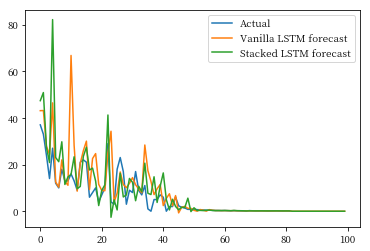

In [27]:
import matplotlib.pyplot as plt
actual=fut
vanilla=buckets1
stackedl=buckets
plt.plot(actual,label='Actual')
plt.plot(vanilla,label='Vanilla LSTM forecast')
plt.plot(stackedl,label='Stacked LSTM forecast')
plt.legend()
#display plot
plt.show()